In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
path = "cs231n/datasets/cifar-10-batches-py"
X_train, y_train, X_test, y_test = load_CIFAR10(path)

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
for y, cls in enumerate(classes):
    print y, cls

0 plane
1 car
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


In [4]:
np.flatnonzero?

<function matplotlib.pyplot.show>

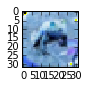

In [5]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0])
plt.show

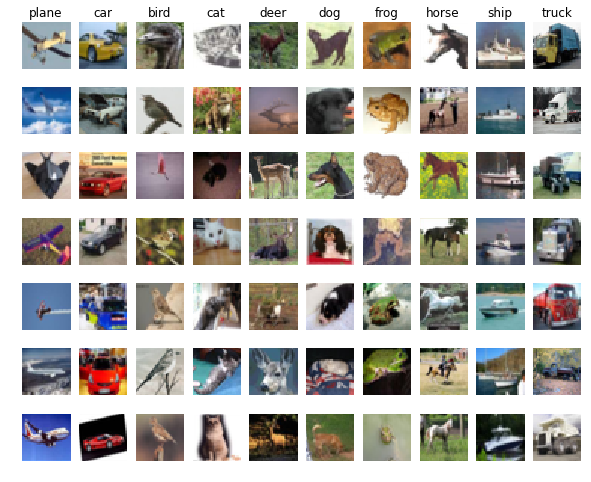

In [6]:
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## Subsample the data for more efficient code execution in this exercise

In [7]:
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test= 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [8]:
X_test.shape

(500, 32, 32, 3)

### Reshape the image data into vecors (rows)

In [9]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print X_train.shape, X_test.shape

(5000, 3072) (500, 3072)


## KNN

In [10]:
class KNearestNeighbor(object):
  """ a kNN classifier with L2 distance """

  def train(self, X, y):
    """
    Train the classifier. For k-nearest neighbors this is just
    memorizing the training data.

    Inputs:
    - X: A numpy array of shape (num_train, D) containing the training data
      consisting of num_train samples each of dimension D.
    - y: A numpy array of shape (N,) containing the training labels, where
         y[i] is the label for X[i].
    """
    self.X_train = X
    self.y_train = y

  def predict(self, X, k=1, num_loops=0):
    """
    Predict labels for test data using this classifier.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data consisting
         of num_test samples each of dimension D.
    - k: The number of nearest neighbors that vote for the predicted labels.
    - num_loops: Determines which implementation to use to compute distances
      between training points and testing points.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].
    """
    if num_loops == 0:
      dists = self.compute_distances_no_loops(X)
    elif num_loops == 1:
      dists = self.compute_distances_one_loop(X)
    elif num_loops == 2:
      dists = self.compute_distances_two_loops(X)
    else:
      raise ValueError('Invalid value %d for num_loops' % num_loops)

    return self.predict_labels(dists, k=k)

  def compute_distances_two_loops(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a nested loop over both the training data and the
    test data.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data.

    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in xrange(num_test):
      for j in xrange(num_train):
        #####################################################################
        # TODO:                                                             #
        # Compute the l2 distance between the ith test point and the jth    #
        # training point, and store the result in dists[i, j]. You should   #
        # not use a loop over dimension.                                    #
        #####################################################################
        dists[i,j] = np.sqrt(np.sum(np.square(X[i] - self.X_train[j])))
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
    return dists

  def compute_distances_one_loop(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a single loop over the test data.

    Input / Output: Same as compute_distances_two_loops
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in xrange(num_test):
      #######################################################################
      # TODO:                                                               #
      # Compute the l2 distance between the ith test point and all training #
      # points, and store the result in dists[i, :].                        #
      #######################################################################
      dists[i, :] = np.sqrt(np.sum(np.square(self.X_train - X[i, :]), axis =1 )) # broadcasting
      #######################################################################
      #                         END OF YOUR CODE                            #
      #######################################################################
    return dists

  def compute_distances_no_loops(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using no explicit loops.

    Input / Output: Same as compute_distances_two_loops
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    #########################################################################
    # TODO:                                                                 #
    # Compute the l2 distance between all test points and all training      #
    # points without using any explicit loops, and store the result in      #
    # dists.                                                                #
    #                                                                       #
    # You should implement this function using only basic array operations; #
    # in particular you should not use functions from scipy.                #
    #                                                                       #
    # HINT: Try to formulate the l2 distance using matrix multiplication    #
    #       and two broadcast sums.                                         #
    #########################################################################
    # Output: sqrt((x-y)^2)
    # (x-y)^2 = x^2 + y^2 - 2xy
    test_sum = np.sum(np.square(X), axis=1) # num_test x 1
    train_sum = np.sum(np.square(self.X_train), axis=1) # num_train x 1
    inner_product = np.dot(X, self.X_train.T) # num_test x num_train
    dists = np.sqrt(-2 * inner_product + test_sum.reshape(-1, 1) + train_sum) # broadcast
    #########################################################################
    #                         END OF YOUR CODE                              #
    #########################################################################
    return dists

  def predict_labels(self, dists, k=1):
    """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.

    Inputs:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance betwen the ith test point and the jth training point.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].
    """
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in xrange(num_test):
      # A list of length k storing the labels of the k nearest neighbors to
      # the ith test point.
      closest_y = []
      #########################################################################
      # TODO:                                                                 #
      # Use the distance matrix to find the k nearest neighbors of the ith    #
      # testing point, and use self.y_train to find the labels of these       #
      # neighbors. Store these labels in closest_y.                           #
      # Hint: Look up the function numpy.argsort.                             #
      #########################################################################
      y_indices = np.argsort(dists[i, :], axis = 0)
      closest_y = self.y_train[y_indices[:k]]
      #########################################################################
      # TODO:                                                                 #
      # Now that you have found the labels of the k nearest neighbors, you    #
      # need to find the most common label in the list closest_y of labels.   #
      # Store this label in y_pred[i]. Break ties by choosing the smaller     #
      # label.                                                                #
      #########################################################################
      y_pred[i] = np.argmax(np.bincount(closest_y))
      #########################################################################
      #                           END OF YOUR CODE                            #
      #########################################################################

    return y_pred


In [11]:
clf = KNearestNeighbor()
clf.train(X_train, y_train)

In [12]:
dists = clf.compute_distances_no_loops(X_test)

In [13]:
dists

array([[ 3803.92350081,  4210.59603857,  5504.0544147 , ...,
         4007.64756434,  4203.28086142,  4354.20256764],
       [ 6336.83367306,  5270.28006846,  4040.63608854, ...,
         4829.15334194,  4694.09767687,  7768.33347636],
       [ 5224.83913628,  4250.64289255,  3773.94581307, ...,
         3766.81549853,  4464.99921613,  6353.57190878],
       ..., 
       [ 5366.93534524,  5062.8772452 ,  6361.85774755, ...,
         5126.56824786,  4537.30613911,  5920.94156364],
       [ 3671.92919322,  3858.60765044,  4846.88157479, ...,
         3521.04515734,  3182.3673578 ,  4448.65305458],
       [ 6960.92443573,  6083.71366848,  6338.13442584, ...,
         6083.55504619,  4128.24744898,  8041.05223214]])

In [14]:
y_indices = np.argsort(dists[0], axis = 0)

In [15]:
closest_y = y_train[y_indices[:5]]

In [16]:
np.argmax(np.bincount(closest_y))

4

In [17]:
clf.predict(X_test[2:3], k=9)


array([ 8.])

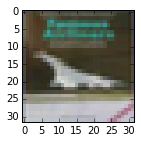

In [18]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[3].reshape(32, 32, 3))

In [19]:
y_test[2]

8

###Compute accuracy

In [20]:
y_test_pred = clf.predict(X_test, k=1)

In [21]:
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 137 / 500 correct => accuracy: 0.274000


### With K = 5

In [ ]:
y_test_pred = clf.predict(X_test, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 139 / 500 correct => accuracy: 0.278000


In [ ]:
%time clf.compute_distances_two_loops(X_test)

## Making a Validation set to tune hyper-params

In [ ]:
# take first 1000 to use for validation
Xval = X_train[:1000]
yval = y_train[:1000]
# keep last 49,000 for training
Xtr = X_train[1000:]
ytr = y_train[1000:]

In [ ]:
validation_accuracies = []
for k in [1, 3, 5, 10, 30, 50, 100]:
    
    knn = KNearestNeighbor()
    knn.train(Xtr, ytr)
    
    yval_predict = knn.predict(Xval, k = k)
    acc = np.mean(yval_predict == yval)
    print 'k: %d -- accuracy: %f' % (k, acc)
    
    # keep track of what works on the validation sets
    validation_accuracies.append((k, acc))
    

## Cross-Validation
- use k fold CV to determine the best value of k

In [ ]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20]

X_train_folds = []
y_train_folds = []

# split the training data into folds, X_train_folds and y_train_folds
# should each be lists of length num_folds, where y_train_folds[i] is the 
# label vector for the points in X_train_folds[i]
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

# A dictionary holding the accuracies for different values of k that we
# find when running cross-validation. After running CV, 
# k_to_accuracies[k] should be a list of length num_folds giving to 
# different accuracy values that we found when using the value of k.
k_to_accuracies = {}

# perform k-fold cv to find the best value of k. for each possible value 
# of k, run the k-nn algo num_folds times, where in each case you use all
# but one of the folds as training data and the last fold as a validation
# set. store the accuracies for all fold and all vals of k in the dict.
for k in k_choices:
    k_to_accuracies[k] = []
    # Run kNN algorithm num_folds times
    for i in range(num_folds):
        # Concatenate arrays
        X_train_new = []
        y_train_new = []
        X_test_new = X_train_folds[i]
        y_train_new = y_train_folds[i]
        for j in range(num_folds):
            if i != j:
                X_train_new.extend(X_train_folds[j])
                y_train_new.extend(y_train_folds[j])

        X_train_new = np.array(X_train_new)
        y_train_new = np.array(y_train_new)
        classifier = KNearestNeighbor()
        classifier.train(X_train_new, y_train_new)
        classifier.predict(X_test_new)

        accuracy = np.mean(y_test_pred == y_test_new)
        
        k_to_accuracies[k].append(accuracy)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print 'k = %d, accuracy = %f' % (k, accuracy)
        

In [ ]:
for i in range(num_folds):
    idx = np.array(xrange(num_folds))
    idx = idx[idx != i]
    X_train_new = X_train_folds[idx]
    y_train_new = y_train_folds[idx]
    d1_shape = reduce(lambda x, y: x*y, X_train_new.shape[:2])
    X_train_new = X_train_new.reshape(d1_shape, -1)
    y_train_new = y_train_new.reshape(d1_shape, -1)
    
    
    
    

In [ ]:
for i in range(num_folds):
    # Concatenate arrays
    X_train_new = []
    y_train_new = []
    for j in range(num_folds):
        if i != j:
            X_train_new.extend(X_train_folds[j])
            y_train_new.extend(y_train_folds[j])
            
    print len(X_train_new)



In [ ]:
idx = [1, 2, 3, 4]

In [ ]:
type(y_train_folds)

In [165]:
X_train_folds[idx].reshape(4000, -1)[0]

array([ 242.,  243.,  250., ...,  105.,  123.,  135.])

In [182]:
d1 =X_train_folds[idx].shape[0:2]

In [190]:
reduce(lambda x, y: x*y, d1)

4000